# #Task-7.1
## Name: Aftab Ahmed
## Registration ID: SIRSS2310

## Q1. Implement gradient descent (for simple linear regression) from scratch.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Salary_Data.csv')
df.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
df.shape

(30, 2)

In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [9]:
df.nunique()

YearsExperience    28
Salary             30
dtype: int64

In [10]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

## Implementation of Simple Linear Regression

In [11]:
class SimpleLinearRegression():
    def __init__(self , learning_rate , iterations) :
        self.learning_rate = learning_rate
        self.iterations = iterations
    # Function for model training
    def fit(self , X , Y) :
        # no_of_training_examples, no_of_features
        self.m, self.n = X.shape
        # weight initialization
        self.W = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y
        # gradient descent learning
        for i in range(self.iterations) :   
            self.update_weights() 
        return self
    # Helper function to update weights in gradient descent
    def update_weights(self) :    
        Y_pred = self.predict(self.X)   
        # calculate gradients  
        dW = -( 2 * (self.X.T).dot(self.Y - Y_pred )) / self.m  
        db = - 2 * np.sum(self.Y - Y_pred ) / self.m  
        # update weights 
        self.W = self.W - self.learning_rate * dW 
        self.b = self.b - self.learning_rate * db 
        return self
    def predict(self , X) :   
            return X.dot(self.W) + self.b

## Training the model

## Model predictions with all values (without train-test split)

In [12]:
mdl = SimpleLinearRegression( iterations = 1000, learning_rate = 0.01 )
mdl.fit(X, Y)

In [13]:
result = mdl.predict(X)

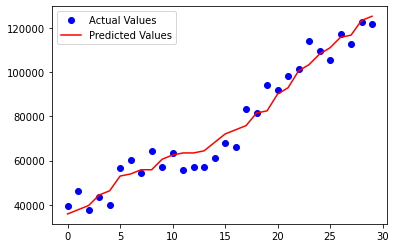

In [14]:
plt.figure(figsize = (6,4))
plt.plot(Y, 'o',color = 'blue', label = 'Actual Values')
plt.plot(result, color = 'red', label = 'Predicted Values')
plt.legend()

In [15]:
test_df = pd.DataFrame()
test_df['Actual Values'] = Y
test_df['Predicted_values'] = result
test_df

,Actual Values,Predicted_values
0,39343.0,35899.296287
1,46205.0,37799.498931
2,37731.0,39699.701575
3,43525.0,44450.208185
4,39891.0,46350.410829
5,56642.0,53001.120083
6,60150.0,53951.221405
7,54445.0,55851.424049
8,64445.0,55851.424049
9,57189.0,60601.930658


## Model predictions with train-test split

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [17]:
mdl2 = SimpleLinearRegression( iterations = 1000, learning_rate = 0.01 )
mdl2.fit(X, Y)

In [18]:
Y_pred = mdl2.predict(X_test)

In [19]:
test2_df = pd.DataFrame()
test2_df['Actual Values'] = Y_test
test2_df['Predicted_values'] = Y_pred
test2_df

,Actual Values,Predicted_values
0,37731.0,39699.701575
1,122391.0,123308.617908
2,57081.0,64402.335946
3,63218.0,62502.133302
4,116969.0,115707.807332
5,109431.0,108106.996756
6,112635.0,116657.908654
7,55794.0,63452.234624
8,83088.0,75803.551810


In [20]:
print( "Trained weight: ", round( mdl2.W[0], 2))
print( "Trained bias: ", round(mdl2.b, 2))

Trained weight:  9501.01
Trained bias:  25448.18


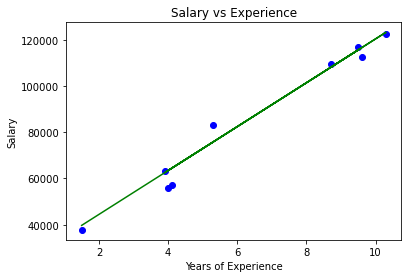

In [21]:
plt.scatter( X_test, Y_test, color = 'blue' )
plt.plot( X_test, Y_pred, color = 'green' )
plt.title( 'Salary vs Experience' )
plt.xlabel( 'Years of Experience' )
plt.ylabel( 'Salary' )
plt.show()